In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from numpy import absolute, mean, std
#import lightgbm as lgbm
#from catboost import CatBoostRegressor

In [3]:
df1 = pd.read_csv('milano-session-gis.csv')
df1=df1.drop(['network_display_name', 'has_l2', 'payment_type', 'tou_status', 'currency_iso_code', 'network_logo_url', 'address2', 'parking_accessibility', 'can_remote_start_charge', 'can_remote_start_charge', 'access_restriction', 'parking_label', 'name2', 'has_dc', 'max_power'], axis=1)
df1

,fid,device_id,count_in_use,lat,lon,station_status,display_level,name1,address1,city,...,-meydanlar_network1,-metroistasyonlari_network1,-kamubinalari_network1,-kafeler_network1,-hastaneler_network1,-eczaneler_network1,-dinlenmetesisleri_network1,-benzinistasyonlari_network1,-avmler_network1,-atmler_network1
0,1,6619375,0,45.491197,9.271355,available,DC Fast,VEGA CARBURANTI,Via Cassanese,Segrate,...,70,70,70,80,70,100,0,90,0,90
1,2,1000205365,0,45.547150,9.232290,available,AC,Media World - Cinisello Balsamo - V.le Fulvio ...,Viale Fulvio Testi 210,Cinisello Balsamo,...,60,100,90,100,70,100,0,100,0,90
2,3,1000205385,190,45.489185,9.151168,available,AC,Media World - Milano Certosa (MI),Viale Certosa 29,Milano,...,90,90,100,100,100,100,50,100,90,90
3,4,1000205405,252,45.480034,9.246676,available,AC,Media World - Milano Rubattino (MI),Via Rubattino ang. Via Pitteri 84,Milano,...,100,90,60,90,70,80,0,90,40,60
4,5,1002741275,576,45.472507,9.180865,available,AC,R220 - Milano Via Beretta,Via Antonio Beretta 2,Milano,...,100,100,90,100,90,100,0,90,70,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,1012017735,0,45.547909,9.206400,available,DC Fast,F2XITD1151 Cinisello Balsamo | A4 Torino - Tri...,"A4, Torino - Trieste",Cinisello Balsamo,...,80,70,80,90,70,100,0,100,0,90
292,293,1012032105,0,45.490601,9.161978,unknown,DC Fast,1922_MILANO - MAHON,"Via Mac Mahon, 43 NA",MILANO,...,90,100,90,100,90,100,40,100,80,90
293,294,1012047825,247,45.483116,9.159662,available,AC,E006133 via Fra Gerolamo Savonarola,via Fra Gerolamo Savonarola,Milano,...,100,100,90,100,100,100,40,100,90,100
294,295,1012110035,121,45.476547,9.129188,available,AC,22T3KKJAK00620*1 21XP22T3KKJAK00620,Degli Aldobrandini,Milano,...,70,100,80,80,80,80,40,100,70,70


In [3]:
df = pd.read_csv('session_682.csv')
df=df.drop(['network_display_name', 'has_l2', 'payment_type', 'tou_status', 'currency_iso_code', 'network_logo_url', 'address2', 'parking_accessibility', 'can_remote_start_charge', 'can_remote_start_charge', 'access_restriction', 'parking_label', 'name2', 'has_dc', 'max_power'], axis=1)
df

/var/folders/yn/yhyygfsj1pvdbcdkd6388wwm0000gn/T/ipykernel_1525/2968202653.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('session_682.csv')


,lat,lon,station_status,device_id,display_level,name1,address1,city,datetime
0,45.477734,9.195445,available,1008307385,AC,Connettore Sinis Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226
1,45.477734,9.195471,available,1008307715,AC,Connettore Destr Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226
2,45.477306,9.189315,available,1004284295,AC,10T2001AF00011*1 20ZH10T2001AF00011,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
3,45.477306,9.189315,available,1004288155,AC,10T2001AF00029*1 20ZH10T2001AF00029,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
4,45.477314,9.189270,available,1004281845,AC,10T2001AF00015*1 20ZH10T2001AF00015,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226
...,...,...,...,...,...,...,...,...,...
409195,48.139332,11.587529,available,1004550895,AC,010302 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562
409196,48.139332,11.587502,available,1004550715,AC,010301 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562
409197,48.141392,11.586725,in_use,1004541745,AC,009402 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562
409198,48.141392,11.586698,available,1004541525,AC,009401 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562


In [4]:
df['count'] = df.groupby('device_id')['station_status'].transform(lambda x: (x == 'in_use').sum())
df

,lat,lon,station_status,device_id,display_level,name1,address1,city,datetime,count
0,45.477734,9.195445,available,1008307385,AC,Connettore Sinis Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226,110
1,45.477734,9.195471,available,1008307715,AC,Connettore Destr Milano | Piazza della Repubblica,Piazza della Repubblica,Milano,2023-12-06 22:42:05.540226,44
2,45.477306,9.189315,available,1004284295,AC,10T2001AF00011*1 20ZH10T2001AF00011,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,229
3,45.477306,9.189315,available,1004288155,AC,10T2001AF00029*1 20ZH10T2001AF00029,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,137
4,45.477314,9.189270,available,1004281845,AC,10T2001AF00015*1 20ZH10T2001AF00015,"Via San Marco, 30",Milano,2023-12-06 22:42:05.540226,47
...,...,...,...,...,...,...,...,...,...,...
409195,48.139332,11.587529,available,1004550895,AC,010302 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562,969
409196,48.139332,11.587502,available,1004550715,AC,010301 Pfarrstr. 3,Pfarrstr. 3,München,2023-12-12 10:08:50.219562,867
409197,48.141392,11.586725,in_use,1004541745,AC,009402 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562,489
409198,48.141392,11.586698,available,1004541525,AC,009401 Liebigstr. 5a,Liebigstr. 5A,München,2023-12-12 10:08:50.219562,468


In [5]:
summary_df = df.groupby('device_id').agg(count_in_use=('station_status', lambda x: (x == 'in_use').sum())).reset_index()
summary_df=summary_df.merge(df, on='device_id', how='left')
summary_df=summary_df.drop_duplicates(subset=['device_id'])
summary_df=summary_df.reset_index(drop=True)
summary_df=summary_df.drop(['count', 'station_status'], axis=1)
summary_df

,device_id,count_in_use,lat,lon,display_level,name1,address1,city,datetime
0,2830225,0,48.145280,11.536327,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
1,2830235,0,48.145252,11.536413,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
2,2830245,0,48.145256,11.536456,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
3,2830255,0,48.145253,11.536495,AC,MB-MUENCHEN,61 Arnulfstraße,München,2023-12-06 22:42:47.988366
4,2830265,0,48.145499,11.536684,AC,MB-MUENCHEN,Arnulfstraße 61,München,2023-12-06 22:42:47.988366
...,...,...,...,...,...,...,...,...,...
800,1012047825,21,45.483116,9.159662,AC,E006133 via Fra Gerolamo Savonarola,via Fra Gerolamo Savonarola,Milano,2023-12-06 22:42:17.829441
801,1012062735,0,48.106392,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896
802,1012062745,36,48.106403,11.599995,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896
803,1012062755,0,48.106403,11.599985,AC,ChargeOne (Claus Heinemann Elektroanlagen GmbH) -,Aschauer Straße 12,München,2023-12-06 22:43:00.094896


In [9]:
summary_df.to_csv('chargedata_last0.csv', index=False)

In [8]:
df1 = pd.read_csv('milano-nominal.csv')
df1

,fid,device_id,count_in_u,lat,lon,display_le,name1,address1,city,datetime,...,-meydanlar_network1,-metroistasyonlari_network1,-kamubinalari_network1,-kafeler_network1,-hastaneler_network1,-eczaneler_network1,-dinlenmetesisleri_network1,-benzinistasyonlari_network1,-avmler_network1,-atmler_network1
0,1,6619375,0,45.491197,9.271355,DC Fast,VEGA CARBURANTI,Via Cassanese,Segrate,2023/12/06 22:42:11.430,...,70,70,70,80,70,100,0,90,0,90
1,2,1000205365,0,45.547150,9.232290,AC,Media World - Cinisello Balsamo - V.le Fulvio ...,Viale Fulvio Testi 210,Cinisello Balsamo,2023/12/06 22:42:23.984,...,60,100,90,100,70,100,0,100,0,90
2,3,1000205385,28,45.489185,9.151168,AC,Media World - Milano Certosa (MI),Viale Certosa 29,Milano,2023/12/06 22:42:17.829,...,90,90,100,100,100,100,50,100,90,90
3,4,1000205405,26,45.480034,9.246676,AC,Media World - Milano Rubattino (MI),Via Rubattino ang. Via Pitteri 84,Milano,2023/12/06 22:42:11.430,...,100,90,60,90,70,80,0,90,40,60
4,5,1002741275,25,45.472507,9.180865,AC,R220 - Milano Via Beretta,Via Antonio Beretta 2,Milano,2023/12/07 16:12:12.146,...,100,100,90,100,90,100,0,90,70,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,1011821625,54,45.495304,9.123845,AC,1999_MILANO - URUGUAY,"Via Uruguay, 6 NA",MILANO,2023/12/06 22:42:17.829,...,60,100,80,100,80,100,50,100,60,70
285,286,1011961275,0,45.477165,9.151939,DC Fast,Citylife,Viale Berengario 1,Milan,2023/12/06 22:42:17.829,...,80,100,90,100,100,100,40,100,100,90
286,287,1012017735,0,45.547909,9.206400,DC Fast,F2XITD1151 Cinisello Balsamo | A4 Torino - Tri...,"A4, Torino - Trieste",Cinisello Balsamo,2023/12/06 22:42:23.984,...,80,70,80,90,70,100,0,100,0,90
287,288,1012032105,0,45.490601,9.161978,DC Fast,1922_MILANO - MAHON,"Via Mac Mahon, 43 NA",MILANO,2023/12/06 22:42:17.829,...,90,100,90,100,90,100,40,100,80,90


In [9]:
df1 = df1.merge(summary_df, how = 'left', left_on = 'device_id', right_on = 'device_id')
df1=df1.drop(['name1_x', 'address1_x', 'city_x', 'datetime_x', 'lat_y', 'lon_y', 'name1_y', 'address1_y', 'city_y', 'display_level', 'datetime_y', 'count_in_u'], axis=1)
#df1['count_in_u'] = df['count_in_use'].fillna(0)
df1

,fid,device_id,lat_x,lon_x,display_le,-universiteler_network1,-trenistasyonlari_network1,-tramvayistasyonları_network1,-stadyumlar_network1,-sinemalar_network1,...,-metroistasyonlari_network1,-kamubinalari_network1,-kafeler_network1,-hastaneler_network1,-eczaneler_network1,-dinlenmetesisleri_network1,-benzinistasyonlari_network1,-avmler_network1,-atmler_network1,count_in_use
0,1,6619375,45.491197,9.271355,DC Fast,60,70,70,40,50,...,70,70,80,70,100,0,90,0,90,0
1,2,1000205365,45.547150,9.232290,AC,60,100,80,80,100,...,100,90,100,70,100,0,100,0,90,0
2,3,1000205385,45.489185,9.151168,AC,60,90,100,90,70,...,90,100,100,100,100,50,100,90,90,32
3,4,1000205405,45.480034,9.246676,AC,70,90,90,50,50,...,90,60,90,70,80,0,90,40,60,46
4,5,1002741275,45.472507,9.180865,AC,60,100,100,60,90,...,100,90,100,90,100,0,90,70,90,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,1011821625,45.495304,9.123845,AC,80,100,80,100,60,...,100,80,100,80,100,50,100,60,70,122
285,286,1011961275,45.477165,9.151939,DC Fast,60,100,100,90,80,...,100,90,100,100,100,40,100,100,90,1
286,287,1012017735,45.547909,9.206400,DC Fast,50,70,80,80,80,...,70,80,90,70,100,0,100,0,90,0
287,288,1012032105,45.490601,9.161978,DC Fast,60,100,100,80,60,...,100,90,100,90,100,40,100,80,90,0


In [5]:
#apply normalization techniques by Column 
column = 'count_in_use'
df1['normalizedcount'] = ((df1[column] - df1[column].min()) / (df1[column].max() - df1[column].min())) * 100
df1

,fid,device_id,count_in_use,lat,lon,station_status,display_level,name1,address1,city,...,-metroistasyonlari_network1,-kamubinalari_network1,-kafeler_network1,-hastaneler_network1,-eczaneler_network1,-dinlenmetesisleri_network1,-benzinistasyonlari_network1,-avmler_network1,-atmler_network1,normalizedcount
0,1,6619375,0,45.491197,9.271355,available,DC Fast,VEGA CARBURANTI,Via Cassanese,Segrate,...,70,70,80,70,100,0,90,0,90,0.000000
1,2,1000205365,0,45.547150,9.232290,available,AC,Media World - Cinisello Balsamo - V.le Fulvio ...,Viale Fulvio Testi 210,Cinisello Balsamo,...,100,90,100,70,100,0,100,0,90,0.000000
2,3,1000205385,190,45.489185,9.151168,available,AC,Media World - Milano Certosa (MI),Viale Certosa 29,Milano,...,90,100,100,100,100,50,100,90,90,6.146878
3,4,1000205405,252,45.480034,9.246676,available,AC,Media World - Milano Rubattino (MI),Via Rubattino ang. Via Pitteri 84,Milano,...,90,60,90,70,80,0,90,40,60,8.152701
4,5,1002741275,576,45.472507,9.180865,available,AC,R220 - Milano Via Beretta,Via Antonio Beretta 2,Milano,...,100,90,100,90,100,0,90,70,90,18.634746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,292,1012017735,0,45.547909,9.206400,available,DC Fast,F2XITD1151 Cinisello Balsamo | A4 Torino - Tri...,"A4, Torino - Trieste",Cinisello Balsamo,...,70,80,90,70,100,0,100,0,90,0.000000
292,293,1012032105,0,45.490601,9.161978,unknown,DC Fast,1922_MILANO - MAHON,"Via Mac Mahon, 43 NA",MILANO,...,100,90,100,90,100,40,100,80,90,0.000000
293,294,1012047825,247,45.483116,9.159662,available,AC,E006133 via Fra Gerolamo Savonarola,via Fra Gerolamo Savonarola,Milano,...,100,90,100,100,100,40,100,90,100,7.990941
294,295,1012110035,121,45.476547,9.129188,available,AC,22T3KKJAK00620*1 21XP22T3KKJAK00620,Degli Aldobrandini,Milano,...,100,80,80,80,80,40,100,70,70,3.914591


In [4]:
df1.isnull().sum()

fid                              0
device_id                        0
count_in_use                     0
lat                              0
lon                              0
station_status                   0
display_level                    0
name1                            0
address1                         0
city                             0
datetime                         0
-universiteler_network1          0
-trenistasyonlari_network1       0
-tramvayistasyonları_network1    0
-stadyumlar_network1             0
-sinemalar_network1              0
-restoranlar_network1            0
-otoyolkavsaklari_network1       0
-otopark_network1                0
-otogarlar_network1              0
-otobusduraklari_network1        0
-oteller_network1                0
-okullar_network1                0
-meydanlar_network1              0
-metroistasyonlari_network1      0
-kamubinalari_network1           0
-kafeler_network1                0
-hastaneler_network1             0
-eczaneler_network1 

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   fid                            289 non-null    int64  
 1   device_id                      289 non-null    int64  
 2   lat_x                          289 non-null    float64
 3   lon_x                          289 non-null    float64
 4   display_le                     289 non-null    object 
 5   -universiteler_network1        289 non-null    int64  
 6   -trenistasyonlari_network1     289 non-null    int64  
 7   -tramvayistasyonları_network1  289 non-null    int64  
 8   -stadyumlar_network1           289 non-null    int64  
 9   -sinemalar_network1            289 non-null    int64  
 10  -oteller_network1              289 non-null    int64  
 11  -restoranlar_network1          289 non-null    int64  
 12  -parkalanlari_network1         289 non-null    int

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fid,296.0,1.485000e+02,8.559206e+01,1.000000e+00,7.475000e+01,1.485000e+02,2.222500e+02,2.960000e+02
device_id,296.0,1.004159e+09,5.821969e+07,6.619375e+06,1.006226e+09,1.007383e+09,1.009218e+09,1.012169e+09
count_in_use,296.0,2.404662e+02,3.581462e+02,0.000000e+00,0.000000e+00,9.500000e+01,3.870000e+02,3.091000e+03
lat,296.0,4.549007e+01,2.140659e-02,4.545543e+01,4.547731e+01,4.548399e+01,4.549579e+01,4.554791e+01
lon,296.0,9.195277e+00,2.957870e-02,9.123845e+00,9.186310e+00,9.191778e+00,9.214339e+00,9.271844e+00
-universiteler_network1,296.0,6.070946e+01,1.004245e+01,4.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,1.000000e+02
-trenistasyonlari_network1,296.0,9.658784e+01,7.143497e+00,7.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
-tramvayistasyonları_network1,296.0,9.533784e+01,8.746179e+00,7.000000e+01,9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02
-stadyumlar_network1,296.0,6.709459e+01,1.827301e+01,0.000000e+00,6.000000e+01,6.000000e+01,8.000000e+01,1.000000e+02
-sinemalar_network1,296.0,7.733108e+01,1.322447e+01,4.000000e+01,7.000000e+01,8.000000e+01,9.000000e+01,1.000000e+02


In [8]:
numerical_data = df1.select_dtypes(include=['number'])
numerical_data = numerical_data.drop(['fid','device_id','lat','lon'], axis=1)

['count_in_use' '-universiteler_network1' '-trenistasyonlari_network1'
 '-tramvayistasyonları_network1' '-stadyumlar_network1'
 '-sinemalar_network1' '-restoranlar_network1'
 '-otoyolkavsaklari_network1' '-otopark_network1' '-otogarlar_network1'
 '-otobusduraklari_network1' '-oteller_network1' '-okullar_network1'
 '-meydanlar_network1' '-metroistasyonlari_network1'
 '-kamubinalari_network1' '-kafeler_network1' '-hastaneler_network1'
 '-eczaneler_network1' '-dinlenmetesisleri_network1'
 '-benzinistasyonlari_network1' '-avmler_network1' '-atmler_network1'
 'normalizedcount']
24


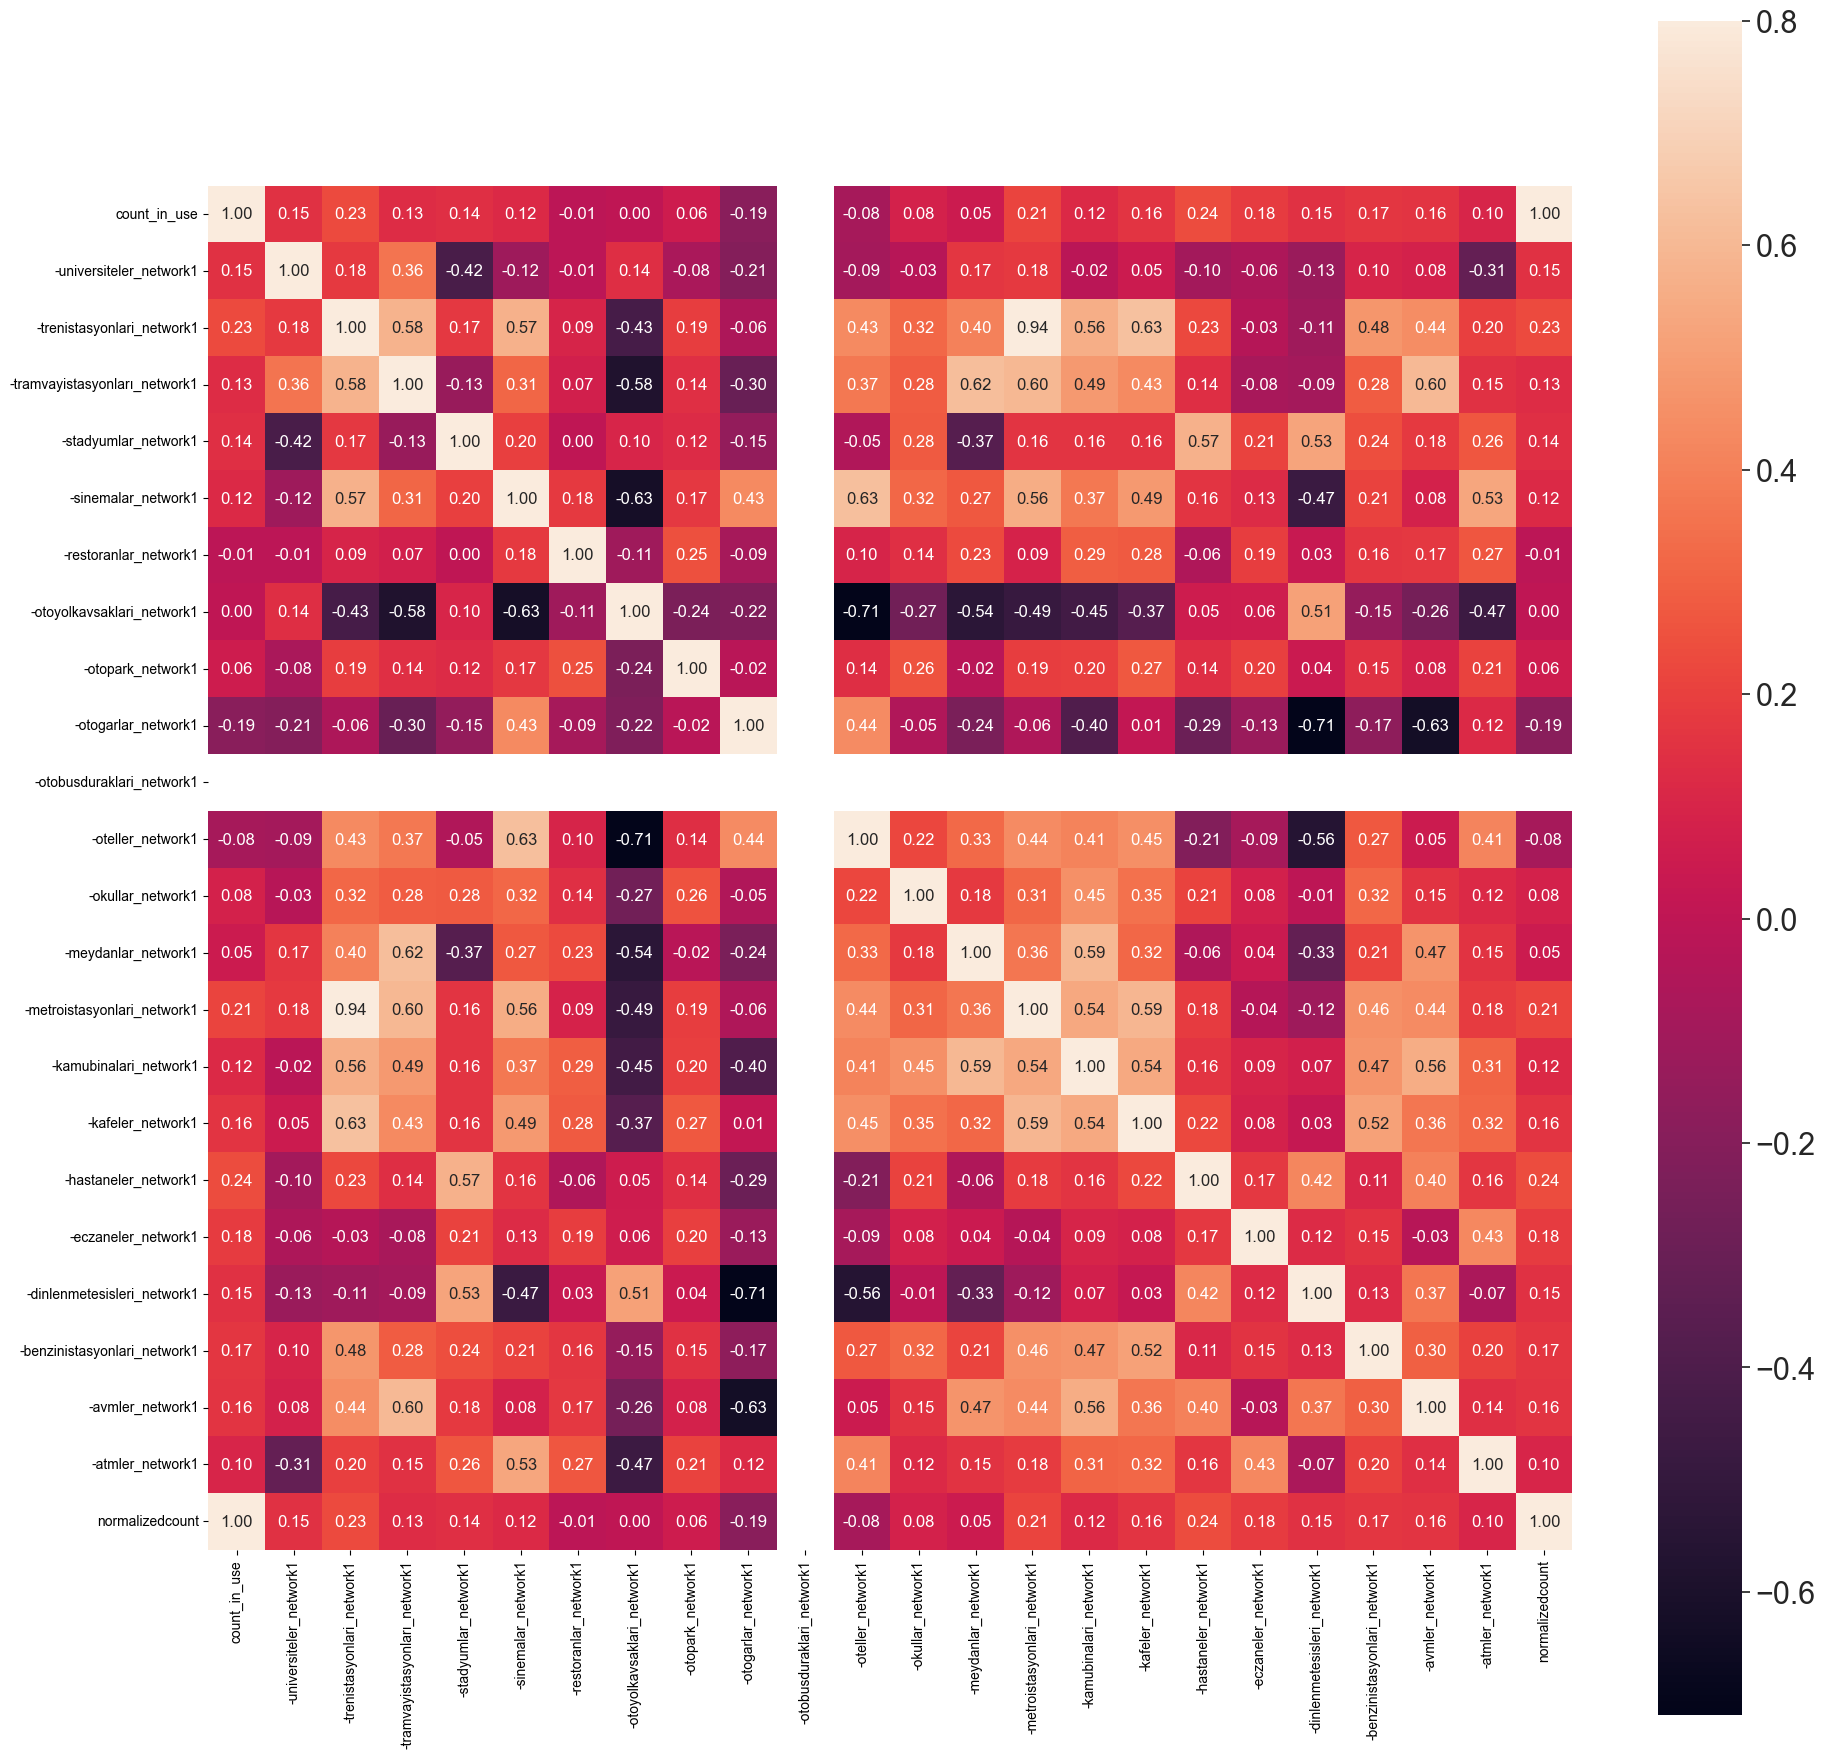

In [ ]:
print(numerical_data.columns.values)
print(len(numerical_data.columns.values))

corrmat = numerical_data.corr()
fig, ax = plt.subplots(figsize=(22, 22))
sns.set(font_scale=2)
sns.heatmap(corrmat, vmax=.8, annot=True, square=True, annot_kws={'size': 12}, fmt='.2f')
plt.show()

['count_in_use' 'normalizedcount' '-hastaneler_network1'
 '-trenistasyonlari_network1' '-metroistasyonlari_network1'
 '-eczaneler_network1' '-benzinistasyonlari_network1' '-avmler_network1'
 '-kafeler_network1' '-universiteler_network1'
 '-dinlenmetesisleri_network1' '-stadyumlar_network1']


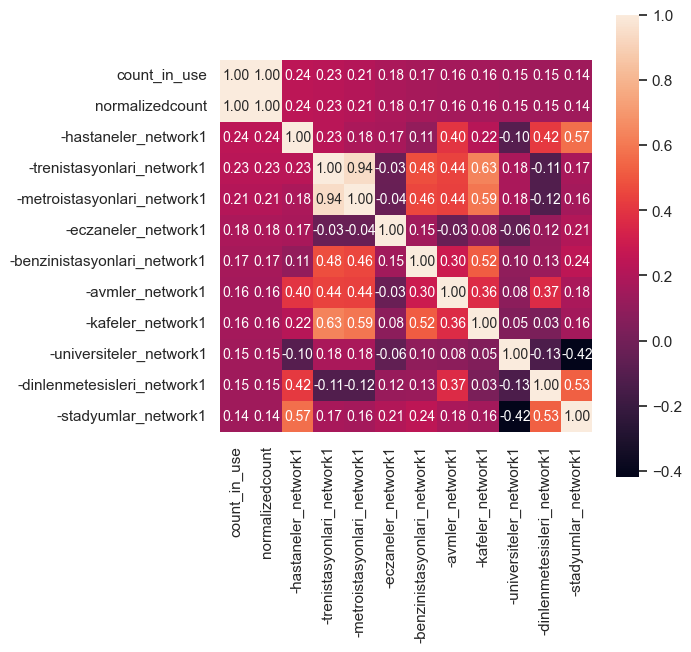

In [16]:
n = 12
most_largest_features = corrmat.nlargest(n, 'count_in_use')['count_in_use'].index
zoomed_corrmat = np.corrcoef(numerical_data[most_largest_features].values.T)
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(font_scale=1)
sns.heatmap(zoomed_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=most_largest_features.values, xticklabels=most_largest_features.values)
print(most_largest_features.values)

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


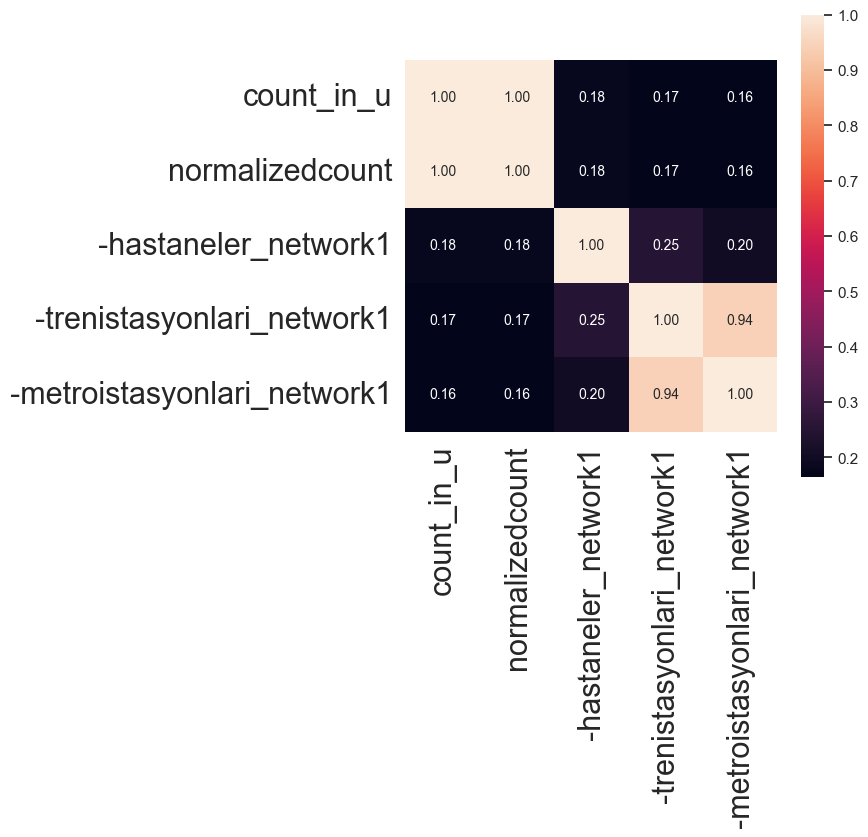

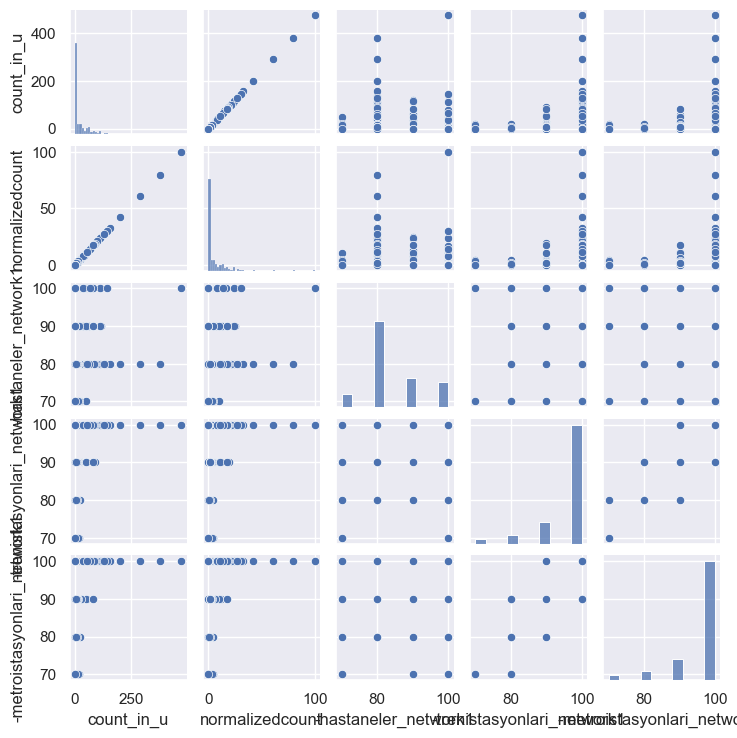

Index(['count_in_u', 'normalizedcount', '-hastaneler_network1',
       '-trenistasyonlari_network1', '-metroistasyonlari_network1'],
      dtype='object')


In [25]:
sns.set()
most_largest_features = corrmat.nlargest(5, 'count_in_u')['count_in_u'].index
sns.pairplot(numerical_data[most_largest_features.values], size=1.5)
plt.show()
print(most_largest_features)

In [15]:
corr_with_price = numerical_data.corr()
corr_with_price = corr_with_price.sort_values(by= 'count_in_use', ascending=False)
corr_with_price['count_in_use']

count_in_use                     1.000000
normalizedcount                  1.000000
-hastaneler_network1             0.236192
-trenistasyonlari_network1       0.230083
-metroistasyonlari_network1      0.213379
-eczaneler_network1              0.181682
-benzinistasyonlari_network1     0.168047
-avmler_network1                 0.162832
-kafeler_network1                0.160823
-universiteler_network1          0.147483
-dinlenmetesisleri_network1      0.146273
-stadyumlar_network1             0.142386
-tramvayistasyonları_network1    0.133426
-kamubinalari_network1           0.120181
-sinemalar_network1              0.119022
-atmler_network1                 0.101981
-okullar_network1                0.081096
-otopark_network1                0.055472
-meydanlar_network1              0.047324
-otoyolkavsaklari_network1       0.002833
-restoranlar_network1           -0.010773
-oteller_network1               -0.084466
-otogarlar_network1             -0.190403
-otobusduraklari_network1         

In [20]:
df2 = df1
df2=df1.drop(['count_in_use', 'fid', 'device_id', 'lat', 'lon', 'display_level', 'station_status', 'name1', 'address1', 'city', 'datetime'], axis=1)
df2

,-universiteler_network1,-trenistasyonlari_network1,-tramvayistasyonları_network1,-stadyumlar_network1,-sinemalar_network1,-restoranlar_network1,-otoyolkavsaklari_network1,-otopark_network1,-otogarlar_network1,-otobusduraklari_network1,...,-metroistasyonlari_network1,-kamubinalari_network1,-kafeler_network1,-hastaneler_network1,-eczaneler_network1,-dinlenmetesisleri_network1,-benzinistasyonlari_network1,-avmler_network1,-atmler_network1,normalizedcount
0,60,70,70,40,50,100,80,100,50,100,...,70,70,80,70,100,0,90,0,90,0.000000
1,60,100,80,80,100,100,90,100,100,100,...,100,90,100,70,100,0,100,0,90,0.000000
2,60,90,100,90,70,100,80,100,0,100,...,90,100,100,100,100,50,100,90,90,6.146878
3,70,90,90,50,50,100,90,100,50,100,...,90,60,90,70,80,0,90,40,60,8.152701
4,60,100,100,60,90,100,60,100,40,100,...,100,90,100,90,100,0,90,70,90,18.634746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,50,70,80,80,80,100,80,100,60,100,...,70,80,90,70,100,0,100,0,90,0.000000
292,60,100,100,80,60,100,70,100,0,100,...,100,90,100,90,100,40,100,80,90,0.000000
293,60,100,100,80,70,100,70,100,0,100,...,100,90,100,100,100,40,100,90,100,7.990941
294,60,100,100,100,60,100,70,100,0,100,...,100,80,80,80,80,40,100,70,70,3.914591


In [21]:
X = df2.iloc[:,:-1]
y = df2.iloc[:,-1:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=2)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

#print(X_validation.shape)
#print(y_validation.shape)

(207, 22)
(89, 22)
(207, 1)
(89, 1)


In [35]:
%%time
model = XGBRegressor()
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
CPU times: user 357 ms, sys: 389 ms, total: 745 ms
Wall time: 92.4 ms


In [36]:
%%time
# make predictions for train data
xgb_y_pred_train = model.predict(X_train)
xgb_train_predictions = [round(value) for value in xgb_y_pred_train]

CPU times: user 6.29 ms, sys: 2.16 ms, total: 8.45 ms
Wall time: 4.94 ms


In [37]:
xgb_train_r2_score = r2_score(y_train, xgb_y_pred_train)
print("R2 Train Score for XGBoost: {}".format(xgb_train_r2_score))

xgb_train_adj_r2_score = 1 - (1-xgb_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for XGBoost: {}".format(xgb_train_adj_r2_score))

xgb_train_mae = mean_absolute_error(y_train, xgb_y_pred_train)
print("Train MAE for XGBoost: {}".format(xgb_train_mae))

xgb_train_mape = mean_absolute_percentage_error(y_train, xgb_y_pred_train)
print("Train MAPE for XGBoost: {}".format(xgb_train_mape))

xgb_train_mse = mean_squared_error(y_train, xgb_y_pred_train)
xgb_train_rmse = np.sqrt(xgb_train_mse)
print("Train RMSE for XGBoost: {}".format(xgb_train_rmse))

R2 Train Score for XGBoost: 0.6106307319867628
Train Adjusted R2 Score for XGBoost: 0.5640757108112671
Train MAE for XGBoost: 3.1851596420140775
Train MAPE for XGBoost: 2323688677817340.0
Train RMSE for XGBoost: 7.837262207753213


In [38]:
%%time
# make predictions for validation data
xgb_y_pred_val = model.predict(X_validation)
xgb_val_predictions = [round(value) for value in xgb_y_pred_val]

NameError: name 'X_validation' is not defined

In [39]:
xgb_val_r2_score = r2_score(y_validation, xgb_y_pred_val)
print("R2 Validation for XGBoost: {}".format(xgb_val_r2_score))

xgb_val_adj_r2_score = 1 - (1-xgb_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for XGBoost: {}".format(xgb_val_adj_r2_score))

xgb_val_mae = mean_absolute_error(y_validation, xgb_y_pred_val)
print("Validation MAE for XGBoost: {}".format(xgb_val_mae))

xgb_val_mape = mean_absolute_percentage_error(y_validation, xgb_y_pred_val)
print("Validation MAPE for XGBoost: {}".format(xgb_val_mape))

xgb_val_mse = mean_squared_error(y_validation, xgb_y_pred_val)
xgb_val_rmse = np.sqrt(xgb_val_mse)
print("Validation RMSE for XGBoost: {}".format(xgb_val_rmse))

NameError: name 'y_validation' is not defined

In [40]:
%%time
# make predictions for test data
xgb_y_pred_test = model.predict(X_test)
xgb_test_predictions = [round(value) for value in xgb_y_pred_test]

CPU times: user 6.98 ms, sys: 1.73 ms, total: 8.71 ms
Wall time: 6.24 ms


In [41]:
xgb_test_r2_score = r2_score(y_test, xgb_y_pred_test)
print("Test R2 Score for XGBoost: {}".format(xgb_test_r2_score))

xgb_test_adj_r2_score = 1 - (1-xgb_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for XGBoost: {}".format(xgb_test_adj_r2_score))

xgb_test_mae = mean_absolute_error(y_test, xgb_y_pred_test)
print("Test MAE for XGBoost: {}".format(xgb_test_mae))

xgb_test_mape = mean_absolute_percentage_error(y_test, xgb_y_pred_test)
print("Test MAPE for XGBoost: {}".format(xgb_test_mape))

xgb_test_mse = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_rmse = np.sqrt(xgb_test_mse)
print("Test RMSE for XGBoost: {}".format(xgb_test_rmse))

Test R2 Score for XGBoost: -0.14374889597646123
Test Adjusted R2 Score for XGBoost: -0.5249985279686151
Test MAE for XGBoost: 6.644405025440345
Test MAPE for XGBoost: 3917618241558098.0
Test RMSE for XGBoost: 9.43634353222266


In [34]:
%%time
model2 = RandomForestRegressor(random_state=1)
model2.fit(X_train, y_train)
print(model2)

RandomForestRegressor(random_state=1)
CPU times: user 77 ms, sys: 2.48 ms, total: 79.5 ms
Wall time: 78.9 ms


<timed exec>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [35]:
%%time
# make predictions for train data
rf_y_pred_train = model2.predict(X_train)
rf_train_predictions = [round(value) for value in rf_y_pred_train]

CPU times: user 15 ms, sys: 3.01 ms, total: 18 ms
Wall time: 15.3 ms


In [36]:
rf_train_r2_score = r2_score(y_train, rf_y_pred_train)
print("Train R2 Score for RandomForest: {}".format(rf_train_r2_score))

rf_train_adj_r2_score = 1 - (1-rf_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest: {}".format(rf_train_adj_r2_score))

rf_train_mae = mean_absolute_error(y_train, rf_y_pred_train)
print("Train MAE for RandomForest: {}".format(rf_train_mae))

rf_train_mape = mean_absolute_percentage_error(y_train, rf_y_pred_train)
print("Train MAPE for RandomForest: {}".format(rf_train_mape))

rf_train_mse = mean_squared_error(y_train, rf_y_pred_train)
rf_train_rmse = np.sqrt(rf_train_mse)
print("Train RMSE for RandomForest: {}".format(rf_train_rmse))

Train R2 Score for RandomForest: 0.6734496730516448
Train Adjusted R2 Score for RandomForest: 0.6333149959965397
Train MAE for RandomForest: 2.6784106141188255
Train MAPE for RandomForest: 4283175018284485.5
Train RMSE for RandomForest: 5.040675894588872


In [60]:
%%time
# make predictions for validation data
rf_y_pred_val = model2.predict(X_validation)
rf_val_predictions = [round(value) for value in rf_y_pred_val]

CPU times: user 14 ms, sys: 2.54 ms, total: 16.6 ms
Wall time: 14.2 ms


In [61]:
rf_val_r2_score = r2_score(y_validation, rf_y_pred_val)
print("Validation R2 Score for RandomForest: {}".format(rf_val_r2_score))

rf_val_adj_r2_score = 1 - (1-rf_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for RandomForest: {}".format(rf_val_adj_r2_score))

rf_val_mae = mean_absolute_error(y_validation, rf_y_pred_val)
print("Validation MAE for RandomForest: {}".format(rf_val_mae))

rf_val_mape = mean_absolute_percentage_error(y_validation, rf_y_pred_val)
print("Validation MAPE for RandomForest: {}".format(rf_val_mape))

rf_val_mse = mean_squared_error(y_validation, rf_y_pred_val)
rf_val_rmse = np.sqrt(rf_val_mse)
print("Validation RMSE for RandomForest: {}".format(rf_val_rmse))

Validation R2 Score for RandomForest: 0.37907057954170986
Validation Adjusted R2 Score for RandomForest: -0.37984315657397816
Validation MAE for RandomForest: 4.637551334938652
Validation MAPE for RandomForest: 9489462776345768.0
Validation RMSE for RandomForest: 6.104012461416725


In [37]:
%%time
# make predictions for test data
rf_y_pred_test = model2.predict(X_test)
rf_test_predictions = [round(value) for value in rf_y_pred_test]

CPU times: user 14.2 ms, sys: 2.03 ms, total: 16.2 ms
Wall time: 14.6 ms


In [38]:
rf_test_r2_score = r2_score(y_test, rf_y_pred_test)
print("Test R2 Score for RandomForest: {}".format(rf_test_r2_score))

rf_test_adj_r2_score = 1 - (1-rf_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest: {}".format(rf_test_adj_r2_score))

rf_test_mae = mean_absolute_error(y_test, rf_y_pred_test)
print("Test MAE for RandomForest: {}".format(rf_test_mae))

rf_test_mape = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Test MAPE for RandomForest: {}".format(rf_test_mape))

rf_test_mse = mean_squared_error(y_test, rf_y_pred_test)
rf_test_rmse = np.sqrt(rf_test_mse)
print("Test RMSE for RandomForest: {}".format(rf_test_rmse))

Test R2 Score for RandomForest: 0.06339938139422119
Test Adjusted R2 Score for RandomForest: -0.2585570812515152
Test MAE for RandomForest: 5.321983927277356
Test MAPE for RandomForest: 5791106877223139.0
Test RMSE for RandomForest: 13.75358754679254


In [24]:
#Random Forest RandomSearch and GridSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [25]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecat

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:4

CPU times: user 452 ms, sys: 120 ms, total: 572 ms
Wall time: 15.9 s


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [27]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10, 15],
    'n_estimators': [200, 400, 600]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [28]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y wa

CPU times: user 359 ms, sys: 46.9 ms, total: 406 ms
Wall time: 8.19 s


/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [200, 400, 600]},
             verbose=2)

In [29]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [30]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200)

In [31]:
modelrf =  grid_search.best_estimator_
# make predictions for train data
rf_grid_y_pred_train = modelrf.predict(X_train)
rf_grid_train_predictions = [round(value) for value in rf_grid_y_pred_train]

In [32]:
rf_grid_train_r2_score = r2_score(y_train, rf_grid_y_pred_train)
print("Train R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_r2_score))

rf_grid_train_adj_r2_score = 1 - (1-rf_grid_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_adj_r2_score))

rf_grid_train_mae = mean_absolute_error(y_train, rf_grid_y_pred_train)
print("Train MAE for RandomForest_GridSearch: {}".format(rf_grid_train_mae))

rf_grid_train_mape = mean_absolute_percentage_error(y_train, rf_grid_y_pred_train)
print("Train MAPE for RandomForest_GridSearch: {}".format(rf_grid_train_mape))

rf_grid_train_mse = mean_squared_error(y_train, rf_grid_y_pred_train)
rf_grid_train_rmse = np.sqrt(rf_grid_train_mse)
print("Train RMSE for RandomForest_GridSearch: {}".format(rf_grid_train_rmse))

Train R2 Score for RandomForest_GridSearch: 0.27743126063627166
Train Adjusted R2 Score for RandomForest_GridSearch: 0.19103717223408667
Train MAE for RandomForest_GridSearch: 6.490862344943882
Train MAPE for RandomForest_GridSearch: 7237104209691885.0
Train RMSE for RandomForest_GridSearch: 10.676357947109663


In [33]:
# make predictions for test data
rf_grid_y_pred_test = modelrf.predict(X_test)
rf_grid_test_predictions = [round(value) for value in rf_grid_y_pred_test]

In [34]:
rf_grid_test_r2_score = r2_score(y_test, rf_grid_y_pred_test)
print("Test R2 Score for RandomForest_GridSearch: {}".format(rf_grid_train_r2_score))

rf_grid_test_adj_r2_score = 1 - (1-rf_grid_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for RandomForest_GridSearch: {}".format(rf_grid_test_adj_r2_score))

rf_grid_test_mae = mean_absolute_error(y_test, rf_grid_y_pred_test)
print("Test MAE for RandomForest_GridSearch: {}".format(rf_grid_test_mae))

rf_grid_test_mape = mean_absolute_percentage_error(y_test, rf_grid_y_pred_test)
print("Test MAPE for RandomForest_GridSearch: {}".format(rf_grid_test_mape))

rf_grid_test_mse = mean_squared_error(y_test, rf_grid_y_pred_test)
rf_grid_test_rmse = np.sqrt(rf_grid_test_mse)
print("Test RMSE for RandomForest_GridSearch: {}".format(rf_grid_test_rmse))

Test R2 Score for RandomForest_GridSearch: 0.27743126063627166
Test Adjusted R2 Score for RandomForest_GridSearch: -0.04443221553763865
Test MAE for RandomForest_GridSearch: 6.110788706098677
Test MAPE for RandomForest_GridSearch: 4979077631159060.0
Test RMSE for RandomForest_GridSearch: 7.809247018424893


In [9]:
%%time
#LightGBM
model4 = lgbm.LGBMRegressor(learning_rate=0.05, n_estimators=500)
model4.fit(X_train, y_train)
print(model4)

LGBMRegressor(learning_rate=0.05, n_estimators=500)
Wall time: 1min 15s


In [10]:
%%time
# make predictions for train data
lgbm_y_pred_train = model4.predict(X_train)
lgbm_train_predictions = [round(value) for value in lgbm_y_pred_train]

Wall time: 27.7 s


In [11]:
lgbm_train_r2_score = r2_score(y_train, lgbm_y_pred_train)
print("Train R2 Score for LightGBM: {}".format(lgbm_train_r2_score))

lgbm_train_adj_r2_score = 1 - (1-lgbm_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LightGBM: {}".format(lgbm_train_adj_r2_score))

lgbm_train_mae = mean_absolute_error(y_train, lgbm_y_pred_train)
print("Train MAE for LightGBM: {}".format(lgbm_train_mae))

lgbm_train_mape = mean_absolute_percentage_error(y_train, lgbm_y_pred_train)
print("Train MAPE for LightGBM: {}".format(lgbm_train_mape))

lgbm_train_mse = mean_squared_error(y_train, lgbm_y_pred_train)
lgbm_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LightGBM: {}".format(lgbm_train_rmse))

Train R2 Score for LightGBM: 0.8286410583552236
Train Adjusted R2 Score for LightGBM: 0.828639202471855
Train MAE for LightGBM: 64996.61871105683
Train MAPE for LightGBM: 0.3181852871740201
Train RMSE for LightGBM: 110607.75303572249


In [12]:
%%time
# make predictions for validation data
lgbm_y_pred_val = model4.predict(X_validation)
lgbm_val_predictions = [round(value) for value in lgbm_y_pred_val]

Wall time: 1.48 s


In [13]:
lgbm_val_r2_score = r2_score(y_validation, lgbm_y_pred_val)
print("Validation R2 Score for LightGBM: {}".format(lgbm_val_r2_score))

lgbm_val_adj_r2_score = 1 - (1-lgbm_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for LightGBM: {}".format(lgbm_val_adj_r2_score))

lgbm_val_mae = mean_absolute_error(y_validation, lgbm_y_pred_val)
print("Validation MAE for LightGBM: {}".format(lgbm_val_mae))

lgbm_val_mape = mean_absolute_percentage_error(y_validation, lgbm_y_pred_val)
print("Validation MAPE for LightGBM: {}".format(lgbm_val_mape))

lgbm_val_mse = mean_squared_error(y_validation, lgbm_y_pred_val)
lgbm_val_rmse = np.sqrt(lgbm_val_mse)
print("Validation RMSE for LightGBM: {}".format(lgbm_val_rmse))

Validation R2 Score for LightGBM: 0.8051359306590924
Validation Adjusted R2 Score for LightGBM: 0.8050958242184493
Validation MAE for LightGBM: 65166.30726411509
Validation MAPE for LightGBM: 0.31797012200616726
Validation RMSE for LightGBM: 116143.49141960399


In [14]:
# make predictions for test data
lgbm_y_pred_test = model4.predict(X_test)
lgbm_test_predictions = [round(value) for value in lgbm_y_pred_test]

In [15]:
lgbm_test_r2_score = r2_score(y_test, lgbm_y_pred_test)
print("Test R2 Score for LightGBM: {}".format(lgbm_test_r2_score))

lgbm_test_adj_r2_score = 1 - (1-lgbm_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LightGBM: {}".format(lgbm_test_adj_r2_score))

lgbm_test_mae = mean_absolute_error(y_test, lgbm_y_pred_test)
print("Test MAE for LightGBM: {}".format(lgbm_test_mae))

lgbm_test_mape = mean_absolute_percentage_error(y_test, lgbm_y_pred_test)
print("Test MAPE for LightGBM: {}".format(lgbm_test_mape))

lgbm_test_mse = mean_squared_error(y_test, lgbm_y_pred_test)
lgbm_test_rmse = np.sqrt(lgbm_test_mse)
print("Test RMSE for LightGBM: {}".format(lgbm_test_rmse))

Test R2 Score for LightGBM: 0.8064254981614662
Test Adjusted R2 Score for LightGBM: 0.8063876495134286
Test MAE for LightGBM: 65709.30578043745
Test MAPE for LightGBM: 0.3201569420749583
Test RMSE for LightGBM: 118862.59477054738


In [31]:
%%time
#CatBoost
model5 = CatBoostRegressor(n_estimators=2000)
model5.fit(X_train, y_train)
print(model5)

Learning rate set to 0.105254
0:	learn: 252529.6049567	total: 524ms	remaining: 17m 27s
1:	learn: 239597.8513967	total: 911ms	remaining: 15m 9s
2:	learn: 228530.7689823	total: 1.29s	remaining: 14m 19s
3:	learn: 218547.0129465	total: 1.68s	remaining: 13m 57s
4:	learn: 209993.9399170	total: 2.09s	remaining: 13m 54s
5:	learn: 202504.9318247	total: 2.48s	remaining: 13m 44s
6:	learn: 196206.4227408	total: 2.83s	remaining: 13m 27s
7:	learn: 190681.7942241	total: 3.24s	remaining: 13m 27s
8:	learn: 185910.5433871	total: 3.63s	remaining: 13m 22s
9:	learn: 181838.0272300	total: 4.04s	remaining: 13m 24s
10:	learn: 178094.3427423	total: 4.42s	remaining: 13m 18s
11:	learn: 174992.6489953	total: 4.81s	remaining: 13m 16s
12:	learn: 172010.3808936	total: 5.21s	remaining: 13m 17s
13:	learn: 169447.9174133	total: 5.62s	remaining: 13m 17s
14:	learn: 167107.9776512	total: 6.01s	remaining: 13m 15s
15:	learn: 165197.9265918	total: 6.42s	remaining: 13m 16s
16:	learn: 163370.2315761	total: 6.84s	remaining: 13m

141:	learn: 131320.2118365	total: 57.3s	remaining: 12m 29s
142:	learn: 131187.1583920	total: 57.7s	remaining: 12m 28s
143:	learn: 131092.3105397	total: 58.1s	remaining: 12m 28s
144:	learn: 131008.8120654	total: 58.5s	remaining: 12m 28s
145:	learn: 130898.4005680	total: 58.9s	remaining: 12m 27s
146:	learn: 130820.5975505	total: 59.2s	remaining: 12m 26s
147:	learn: 130767.1748939	total: 59.7s	remaining: 12m 26s
148:	learn: 130696.6809713	total: 1m	remaining: 12m 26s
149:	learn: 130617.7525385	total: 1m	remaining: 12m 26s
150:	learn: 130500.7561309	total: 1m	remaining: 12m 26s
151:	learn: 130361.2769186	total: 1m 1s	remaining: 12m 26s
152:	learn: 130290.7127937	total: 1m 1s	remaining: 12m 25s
153:	learn: 130227.6491528	total: 1m 2s	remaining: 12m 25s
154:	learn: 130109.8309431	total: 1m 2s	remaining: 12m 24s
155:	learn: 130063.9099800	total: 1m 2s	remaining: 12m 24s
156:	learn: 129941.3038884	total: 1m 3s	remaining: 12m 24s
157:	learn: 129896.9508011	total: 1m 3s	remaining: 12m 23s
158:	l

279:	learn: 122864.5277329	total: 1m 52s	remaining: 11m 28s
280:	learn: 122822.5279306	total: 1m 52s	remaining: 11m 28s
281:	learn: 122748.1223885	total: 1m 52s	remaining: 11m 28s
282:	learn: 122714.0931203	total: 1m 53s	remaining: 11m 27s
283:	learn: 122664.7290412	total: 1m 53s	remaining: 11m 27s
284:	learn: 122618.2713806	total: 1m 54s	remaining: 11m 26s
285:	learn: 122520.1811345	total: 1m 54s	remaining: 11m 26s
286:	learn: 122491.0007282	total: 1m 54s	remaining: 11m 25s
287:	learn: 122470.7402516	total: 1m 55s	remaining: 11m 25s
288:	learn: 122430.4578346	total: 1m 55s	remaining: 11m 24s
289:	learn: 122374.5145466	total: 1m 56s	remaining: 11m 24s
290:	learn: 122322.0166376	total: 1m 56s	remaining: 11m 24s
291:	learn: 122285.0768742	total: 1m 56s	remaining: 11m 23s
292:	learn: 122252.3369892	total: 1m 57s	remaining: 11m 22s
293:	learn: 122221.3045527	total: 1m 57s	remaining: 11m 22s
294:	learn: 122184.8010214	total: 1m 57s	remaining: 11m 21s
295:	learn: 122158.0215400	total: 1m 58s

417:	learn: 118186.0169727	total: 2m 45s	remaining: 10m 27s
418:	learn: 118171.3667827	total: 2m 46s	remaining: 10m 27s
419:	learn: 118152.1214899	total: 2m 46s	remaining: 10m 26s
420:	learn: 118100.3845841	total: 2m 47s	remaining: 10m 26s
421:	learn: 118043.7520468	total: 2m 47s	remaining: 10m 26s
422:	learn: 118020.9270099	total: 2m 47s	remaining: 10m 25s
423:	learn: 118004.3071544	total: 2m 48s	remaining: 10m 25s
424:	learn: 117953.5705005	total: 2m 48s	remaining: 10m 25s
425:	learn: 117914.6169198	total: 2m 49s	remaining: 10m 24s
426:	learn: 117891.6718480	total: 2m 49s	remaining: 10m 24s
427:	learn: 117848.8382403	total: 2m 49s	remaining: 10m 23s
428:	learn: 117799.5079453	total: 2m 50s	remaining: 10m 23s
429:	learn: 117775.1929199	total: 2m 50s	remaining: 10m 23s
430:	learn: 117717.4298469	total: 2m 51s	remaining: 10m 22s
431:	learn: 117697.1725650	total: 2m 51s	remaining: 10m 22s
432:	learn: 117682.6199639	total: 2m 51s	remaining: 10m 21s
433:	learn: 117661.3583372	total: 2m 52s

556:	learn: 114613.3892225	total: 3m 40s	remaining: 9m 31s
557:	learn: 114583.2868880	total: 3m 40s	remaining: 9m 30s
558:	learn: 114562.5174689	total: 3m 41s	remaining: 9m 30s
559:	learn: 114518.9474995	total: 3m 41s	remaining: 9m 29s
560:	learn: 114500.8851266	total: 3m 41s	remaining: 9m 29s
561:	learn: 114485.2228891	total: 3m 42s	remaining: 9m 28s
562:	learn: 114456.9992204	total: 3m 42s	remaining: 9m 28s
563:	learn: 114437.2232693	total: 3m 43s	remaining: 9m 27s
564:	learn: 114419.9297748	total: 3m 43s	remaining: 9m 27s
565:	learn: 114395.9996099	total: 3m 43s	remaining: 9m 26s
566:	learn: 114385.1130979	total: 3m 44s	remaining: 9m 26s
567:	learn: 114373.6531382	total: 3m 44s	remaining: 9m 26s
568:	learn: 114355.4662543	total: 3m 44s	remaining: 9m 25s
569:	learn: 114323.0972681	total: 3m 45s	remaining: 9m 25s
570:	learn: 114299.8508528	total: 3m 45s	remaining: 9m 25s
571:	learn: 114291.3157771	total: 3m 46s	remaining: 9m 24s
572:	learn: 114277.7923824	total: 3m 46s	remaining: 9m 2

697:	learn: 111698.9811180	total: 4m 37s	remaining: 8m 38s
698:	learn: 111666.7158254	total: 4m 38s	remaining: 8m 37s
699:	learn: 111655.6446457	total: 4m 38s	remaining: 8m 37s
700:	learn: 111609.7997453	total: 4m 38s	remaining: 8m 36s
701:	learn: 111601.7156711	total: 4m 39s	remaining: 8m 36s
702:	learn: 111558.3627189	total: 4m 39s	remaining: 8m 35s
703:	learn: 111537.2774464	total: 4m 40s	remaining: 8m 35s
704:	learn: 111522.6391653	total: 4m 40s	remaining: 8m 35s
705:	learn: 111503.1304054	total: 4m 40s	remaining: 8m 34s
706:	learn: 111492.6195540	total: 4m 41s	remaining: 8m 34s
707:	learn: 111471.3507665	total: 4m 41s	remaining: 8m 34s
708:	learn: 111454.2712198	total: 4m 42s	remaining: 8m 33s
709:	learn: 111425.1991843	total: 4m 42s	remaining: 8m 33s
710:	learn: 111390.4207279	total: 4m 42s	remaining: 8m 32s
711:	learn: 111356.3104002	total: 4m 43s	remaining: 8m 32s
712:	learn: 111339.0352161	total: 4m 43s	remaining: 8m 32s
713:	learn: 111323.1116012	total: 4m 44s	remaining: 8m 3

837:	learn: 109296.2718567	total: 5m 34s	remaining: 7m 43s
838:	learn: 109273.5702873	total: 5m 34s	remaining: 7m 42s
839:	learn: 109264.6633525	total: 5m 34s	remaining: 7m 42s
840:	learn: 109258.0870610	total: 5m 35s	remaining: 7m 42s
841:	learn: 109244.2198926	total: 5m 35s	remaining: 7m 41s
842:	learn: 109236.2874119	total: 5m 35s	remaining: 7m 41s
843:	learn: 109209.7279287	total: 5m 36s	remaining: 7m 40s
844:	learn: 109203.4319083	total: 5m 36s	remaining: 7m 40s
845:	learn: 109193.5705093	total: 5m 37s	remaining: 7m 39s
846:	learn: 109182.9195339	total: 5m 37s	remaining: 7m 39s
847:	learn: 109174.3366045	total: 5m 38s	remaining: 7m 39s
848:	learn: 109168.4771345	total: 5m 38s	remaining: 7m 38s
849:	learn: 109162.0716480	total: 5m 38s	remaining: 7m 38s
850:	learn: 109141.1314506	total: 5m 39s	remaining: 7m 38s
851:	learn: 109112.6872128	total: 5m 39s	remaining: 7m 37s
852:	learn: 109101.5203235	total: 5m 40s	remaining: 7m 37s
853:	learn: 109095.8821306	total: 5m 40s	remaining: 7m 3

978:	learn: 107257.7946144	total: 6m 32s	remaining: 6m 49s
979:	learn: 107244.8546643	total: 6m 32s	remaining: 6m 48s
980:	learn: 107236.0978828	total: 6m 33s	remaining: 6m 48s
981:	learn: 107220.3477592	total: 6m 33s	remaining: 6m 48s
982:	learn: 107204.7347571	total: 6m 34s	remaining: 6m 47s
983:	learn: 107199.5314853	total: 6m 34s	remaining: 6m 47s
984:	learn: 107184.1090875	total: 6m 35s	remaining: 6m 47s
985:	learn: 107166.7580169	total: 6m 35s	remaining: 6m 46s
986:	learn: 107153.9364390	total: 6m 36s	remaining: 6m 46s
987:	learn: 107148.5307486	total: 6m 36s	remaining: 6m 46s
988:	learn: 107118.6898696	total: 6m 36s	remaining: 6m 45s
989:	learn: 107105.2205956	total: 6m 37s	remaining: 6m 45s
990:	learn: 107090.5169554	total: 6m 37s	remaining: 6m 44s
991:	learn: 107074.7744272	total: 6m 38s	remaining: 6m 44s
992:	learn: 107063.6994569	total: 6m 38s	remaining: 6m 44s
993:	learn: 107045.8467095	total: 6m 38s	remaining: 6m 43s
994:	learn: 107037.2930152	total: 6m 39s	remaining: 6m 4

1116:	learn: 105533.9486949	total: 7m 29s	remaining: 5m 55s
1117:	learn: 105521.0981277	total: 7m 29s	remaining: 5m 54s
1118:	learn: 105514.0966908	total: 7m 29s	remaining: 5m 54s
1119:	learn: 105505.8367568	total: 7m 30s	remaining: 5m 53s
1120:	learn: 105493.0491398	total: 7m 30s	remaining: 5m 53s
1121:	learn: 105486.3272627	total: 7m 31s	remaining: 5m 52s
1122:	learn: 105481.2797973	total: 7m 31s	remaining: 5m 52s
1123:	learn: 105477.1528370	total: 7m 31s	remaining: 5m 52s
1124:	learn: 105458.8903864	total: 7m 32s	remaining: 5m 51s
1125:	learn: 105443.0183419	total: 7m 32s	remaining: 5m 51s
1126:	learn: 105431.0065676	total: 7m 33s	remaining: 5m 51s
1127:	learn: 105409.4480741	total: 7m 33s	remaining: 5m 50s
1128:	learn: 105400.2397880	total: 7m 34s	remaining: 5m 50s
1129:	learn: 105395.0175734	total: 7m 34s	remaining: 5m 49s
1130:	learn: 105381.4814105	total: 7m 34s	remaining: 5m 49s
1131:	learn: 105367.9302396	total: 7m 35s	remaining: 5m 49s
1132:	learn: 105361.2344628	total: 7m 35

1254:	learn: 104092.4554957	total: 8m 24s	remaining: 4m 59s
1255:	learn: 104082.5005797	total: 8m 25s	remaining: 4m 59s
1256:	learn: 104077.1082049	total: 8m 25s	remaining: 4m 58s
1257:	learn: 104071.8252179	total: 8m 26s	remaining: 4m 58s
1258:	learn: 104069.1565132	total: 8m 26s	remaining: 4m 58s
1259:	learn: 104064.8603922	total: 8m 27s	remaining: 4m 57s
1260:	learn: 104053.9808291	total: 8m 27s	remaining: 4m 57s
1261:	learn: 104046.9997360	total: 8m 27s	remaining: 4m 57s
1262:	learn: 104030.6850909	total: 8m 28s	remaining: 4m 56s
1263:	learn: 104011.8710919	total: 8m 28s	remaining: 4m 56s
1264:	learn: 104004.4259470	total: 8m 28s	remaining: 4m 55s
1265:	learn: 104001.8763466	total: 8m 29s	remaining: 4m 55s
1266:	learn: 103989.5403597	total: 8m 29s	remaining: 4m 54s
1267:	learn: 103984.4880078	total: 8m 30s	remaining: 4m 54s
1268:	learn: 103978.9120755	total: 8m 30s	remaining: 4m 54s
1269:	learn: 103969.1841142	total: 8m 30s	remaining: 4m 53s
1270:	learn: 103963.3244911	total: 8m 31

1392:	learn: 102706.4898602	total: 9m 21s	remaining: 4m 4s
1393:	learn: 102699.1863520	total: 9m 22s	remaining: 4m 4s
1394:	learn: 102693.8929031	total: 9m 22s	remaining: 4m 4s
1395:	learn: 102684.5540858	total: 9m 23s	remaining: 4m 3s
1396:	learn: 102671.3136209	total: 9m 23s	remaining: 4m 3s
1397:	learn: 102664.8983871	total: 9m 23s	remaining: 4m 2s
1398:	learn: 102643.9614683	total: 9m 24s	remaining: 4m 2s
1399:	learn: 102635.2578113	total: 9m 24s	remaining: 4m 2s
1400:	learn: 102628.7890442	total: 9m 25s	remaining: 4m 1s
1401:	learn: 102616.9650414	total: 9m 25s	remaining: 4m 1s
1402:	learn: 102605.4087948	total: 9m 25s	remaining: 4m
1403:	learn: 102603.2682146	total: 9m 26s	remaining: 4m
1404:	learn: 102597.0503351	total: 9m 26s	remaining: 3m 59s
1405:	learn: 102588.3671755	total: 9m 27s	remaining: 3m 59s
1406:	learn: 102583.1161043	total: 9m 27s	remaining: 3m 59s
1407:	learn: 102574.2268468	total: 9m 27s	remaining: 3m 58s
1408:	learn: 102569.9004165	total: 9m 28s	remaining: 3m 58

1529:	learn: 101527.7227979	total: 10m 17s	remaining: 3m 9s
1530:	learn: 101519.7754480	total: 10m 17s	remaining: 3m 9s
1531:	learn: 101514.4026616	total: 10m 17s	remaining: 3m 8s
1532:	learn: 101502.0520034	total: 10m 18s	remaining: 3m 8s
1533:	learn: 101495.1291633	total: 10m 18s	remaining: 3m 7s
1534:	learn: 101490.6100486	total: 10m 19s	remaining: 3m 7s
1535:	learn: 101470.5521406	total: 10m 19s	remaining: 3m 7s
1536:	learn: 101464.1190009	total: 10m 19s	remaining: 3m 6s
1537:	learn: 101451.7233106	total: 10m 20s	remaining: 3m 6s
1538:	learn: 101438.5950433	total: 10m 20s	remaining: 3m 5s
1539:	learn: 101429.0008629	total: 10m 21s	remaining: 3m 5s
1540:	learn: 101423.5511897	total: 10m 21s	remaining: 3m 5s
1541:	learn: 101410.6374193	total: 10m 21s	remaining: 3m 4s
1542:	learn: 101405.8367262	total: 10m 22s	remaining: 3m 4s
1543:	learn: 101396.0970032	total: 10m 22s	remaining: 3m 3s
1544:	learn: 101379.8876817	total: 10m 23s	remaining: 3m 3s
1545:	learn: 101374.6000106	total: 10m 2

1665:	learn: 100366.2299941	total: 11m 11s	remaining: 2m 14s
1666:	learn: 100359.0934348	total: 11m 12s	remaining: 2m 14s
1667:	learn: 100353.5473198	total: 11m 12s	remaining: 2m 13s
1668:	learn: 100348.5571244	total: 11m 13s	remaining: 2m 13s
1669:	learn: 100344.3196327	total: 11m 13s	remaining: 2m 13s
1670:	learn: 100338.7128058	total: 11m 14s	remaining: 2m 12s
1671:	learn: 100335.1849471	total: 11m 14s	remaining: 2m 12s
1672:	learn: 100322.5006187	total: 11m 15s	remaining: 2m 11s
1673:	learn: 100310.9273699	total: 11m 15s	remaining: 2m 11s
1674:	learn: 100302.0948746	total: 11m 15s	remaining: 2m 11s
1675:	learn: 100295.1938535	total: 11m 16s	remaining: 2m 10s
1676:	learn: 100279.8170171	total: 11m 16s	remaining: 2m 10s
1677:	learn: 100275.9744655	total: 11m 17s	remaining: 2m 9s
1678:	learn: 100260.9395279	total: 11m 17s	remaining: 2m 9s
1679:	learn: 100244.2426755	total: 11m 17s	remaining: 2m 9s
1680:	learn: 100229.4631482	total: 11m 18s	remaining: 2m 8s
1681:	learn: 100222.4345934	

1802:	learn: 99303.8004759	total: 12m 7s	remaining: 1m 19s
1803:	learn: 99291.9226148	total: 12m 8s	remaining: 1m 19s
1804:	learn: 99284.7641063	total: 12m 8s	remaining: 1m 18s
1805:	learn: 99279.8881358	total: 12m 9s	remaining: 1m 18s
1806:	learn: 99272.4035919	total: 12m 9s	remaining: 1m 17s
1807:	learn: 99262.1728563	total: 12m 9s	remaining: 1m 17s
1808:	learn: 99253.0900298	total: 12m 10s	remaining: 1m 17s
1809:	learn: 99247.2551272	total: 12m 10s	remaining: 1m 16s
1810:	learn: 99241.9731555	total: 12m 11s	remaining: 1m 16s
1811:	learn: 99236.9074123	total: 12m 11s	remaining: 1m 15s
1812:	learn: 99230.3395395	total: 12m 11s	remaining: 1m 15s
1813:	learn: 99222.0344948	total: 12m 12s	remaining: 1m 15s
1814:	learn: 99216.2596974	total: 12m 12s	remaining: 1m 14s
1815:	learn: 99205.9150592	total: 12m 13s	remaining: 1m 14s
1816:	learn: 99197.9355859	total: 12m 13s	remaining: 1m 13s
1817:	learn: 99193.8634019	total: 12m 13s	remaining: 1m 13s
1818:	learn: 99186.0406249	total: 12m 14s	rema

1942:	learn: 98361.9413892	total: 13m 6s	remaining: 23.1s
1943:	learn: 98358.0330310	total: 13m 6s	remaining: 22.7s
1944:	learn: 98354.8536113	total: 13m 6s	remaining: 22.3s
1945:	learn: 98348.1388349	total: 13m 7s	remaining: 21.8s
1946:	learn: 98341.4053280	total: 13m 7s	remaining: 21.4s
1947:	learn: 98328.1029253	total: 13m 8s	remaining: 21s
1948:	learn: 98318.6726753	total: 13m 8s	remaining: 20.6s
1949:	learn: 98311.8456827	total: 13m 8s	remaining: 20.2s
1950:	learn: 98305.9556645	total: 13m 9s	remaining: 19.8s
1951:	learn: 98294.9918474	total: 13m 9s	remaining: 19.4s
1952:	learn: 98286.6770721	total: 13m 10s	remaining: 19s
1953:	learn: 98277.2363119	total: 13m 10s	remaining: 18.6s
1954:	learn: 98272.7865900	total: 13m 11s	remaining: 18.2s
1955:	learn: 98265.1656128	total: 13m 11s	remaining: 17.8s
1956:	learn: 98257.2722090	total: 13m 11s	remaining: 17.4s
1957:	learn: 98250.2055199	total: 13m 12s	remaining: 17s
1958:	learn: 98240.0335609	total: 13m 12s	remaining: 16.6s
1959:	learn: 

In [32]:
%%time
# make predictions for train data
catboost_y_pred_train = model5.predict(X_train)
catboost_train_predictions = [round(value) for value in catboost_y_pred_train]

Wall time: 7.6 s


In [33]:
catboost_train_r2_score = r2_score(y_train, catboost_y_pred_train)
print("R2 Train Score for CatBoost: {}".format(catboost_train_r2_score))

catboost_train_adj_r2_score = 1 - (1-catboost_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for CatBoost: {}".format(catboost_train_adj_r2_score))

catboost_train_mae = mean_absolute_error(y_train, catboost_y_pred_train)
print("Train MAE for CatBoost: {}".format(catboost_train_mae))

catboost_train_mape = mean_absolute_percentage_error(y_train, catboost_y_pred_train)
print("Train MAPE for CatBoost: {}".format(catboost_train_mape))

catboost_train_mse = mean_squared_error(y_train, catboost_y_pred_train)
catboost_train_rmse = np.sqrt(catboost_train_mse)
print("Train RMSE for CatBoost: {}".format(catboost_train_rmse))

R2 Train Score for CatBoost: 0.8655775884780812
Train Adjusted R2 Score for CatBoost: 0.8655761591017848
Train MAE for CatBoost: 55796.51474361633
Train MAPE for CatBoost: 0.26400548314832034
Train RMSE for CatBoost: 97964.34191692546


In [34]:
%%time
# make predictions for validation data
catboost_y_pred_val = model5.predict(X_validation)
catboost_val_predictions = [round(value) for value in catboost_y_pred_val]

Wall time: 468 ms


In [35]:
catboost_val_r2_score = r2_score(y_validation, catboost_y_pred_val)
print("Validation R2 Score for CatBoost: {}".format(catboost_val_r2_score))

catboost_val_adj_r2_score = 1 - (1-catboost_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for CatBoost: {}".format(catboost_val_adj_r2_score))

catboost_val_mae = mean_absolute_error(y_validation, catboost_y_pred_val)
print("Validation MAE for CatBoost: {}".format(catboost_val_mae))

catboost_val_mape = mean_absolute_percentage_error(y_validation, catboost_y_pred_val)
print("Validation MAPE for CatBoost: {}".format(catboost_val_mape))

catboost_val_mse = mean_squared_error(y_validation, catboost_y_pred_val)
catboost_val_rmse = np.sqrt(catboost_val_mse)
print("Validation RMSE for CatBoost: {}".format(catboost_val_rmse))

Validation R2 Score for CatBoost: 0.8350567058347397
Validation Adjusted R2 Score for CatBoost: 0.8350233749791223
Validation MAE for CatBoost: 56263.431700434645
Validation MAPE for CatBoost: 0.26470787205733165
Validation RMSE for CatBoost: 106855.36334740111


In [36]:
# make predictions for test data
catboost_y_pred_test = model5.predict(X_test)
catboost_test_predictions = [round(value) for value in catboost_y_pred_test]

In [37]:
catboost_test_r2_score = r2_score(y_test, catboost_y_pred_test)
print("Test R2 Score for CatBoost: {}".format(catboost_test_r2_score))

catboost_test_adj_r2_score = 1 - (1-catboost_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for CatBoost: {}".format(catboost_test_adj_r2_score))

catboost_test_mae = mean_absolute_error(y_test, catboost_y_pred_test)
print("Test MAE for CatBoost: {}".format(catboost_test_mae))

catboost_test_mape = mean_absolute_percentage_error(y_test, catboost_y_pred_test)
print("Test MAPE for CatBoost: {}".format(catboost_test_mape))

catboost_test_mse = mean_squared_error(y_test, catboost_y_pred_test)
catboost_test_rmse = np.sqrt(catboost_test_mse)
print("Test RMSE for CatBoost: {}".format(catboost_test_rmse))

Test R2 Score for CatBoost: 0.8379913463715487
Test Adjusted R2 Score for CatBoost: 0.8379602456861617
Test MAE for CatBoost: 56668.976184935804
Test MAPE for CatBoost: 0.2659677217125825
Test RMSE for CatBoost: 108740.22766895825


In [38]:
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test = scaler.transform(X_test)

In [39]:
%%time
#LinearRegression
model6 = LinearRegression()
model6.fit(X_train, y_train)
print(model6)

LinearRegression()
Wall time: 8.39 s


In [40]:
%%time
# make predictions for train data
lin_y_pred_train = model6.predict(X_train)
lin_train_predictions = [round(value) for value in lin_y_pred_train]

Wall time: 7.02 s


In [41]:
lin_train_r2_score = r2_score(y_train, lin_y_pred_train)
print("Train R2 Score for LinearRegression: {}".format(lin_train_r2_score))

lin_train_adj_r2_score = 1 - (1-lin_train_r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("Train Adjusted R2 Score for LinearRegression: {}".format(lin_train_adj_r2_score))

lin_train_mae = mean_absolute_error(y_train, lin_y_pred_train)
print("Train MAE for LinearRegression: {}".format(lin_train_mae))

lin_train_mape = mean_absolute_percentage_error(y_train, lin_y_pred_train)
print("Train MAPE for LinearRegression: {}".format(lin_train_mape))

lin_train_mse = mean_squared_error(y_train, lin_y_pred_train)
lin_train_rmse = np.sqrt(lgbm_train_mse)
print("Train RMSE for LinearRegression: {}".format(lin_train_rmse))

Train R2 Score for LinearRegression: 0.45505947521966206
Train Adjusted R2 Score for LinearRegression: 0.4550536806124962
Train MAE for LinearRegression: 100949.07055330864
Train MAPE for LinearRegression: 0.4964011590795884
Train RMSE for LinearRegression: 110420.67328523577


In [42]:
%%time
# make predictions for validation data
lin_y_pred_val = model6.predict(X_validation)
lin_val_predictions = [round(value) for value in lin_y_pred_val]

C:\Users\METE\anaconda3\envs\geo\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Wall time: 429 ms


In [43]:
lin_val_r2_score = r2_score(y_validation, lin_y_pred_val)
print("Validation R2 Score for LinearRegression: {}".format(lin_val_r2_score))

lin_val_adj_r2_score = 1 - (1-lin_val_r2_score)*(len(y_validation)-1)/(len(y_validation)-X_validation.shape[1]-1)
print("Validation Adjusted R2 Score for LinearRegression: {}".format(lin_val_adj_r2_score))

lin_val_mae = mean_absolute_error(y_validation, lin_y_pred_val)
print("Validation MAE for LinearRegression: {}".format(lin_val_mae))

lin_val_mape = mean_absolute_percentage_error(y_validation, lin_y_pred_val)
print("Validation MAPE for LinearRegression: {}".format(lin_val_mape))

lin_val_mse = mean_squared_error(y_validation, lin_y_pred_val)
lin_val_rmse = np.sqrt(lin_val_mse)
print("Validation RMSE for LinearRegression: {}".format(lin_val_rmse))

Validation R2 Score for LinearRegression: -8.169267450856633e+18
Validation Adjusted R2 Score for LinearRegression: -8.170918252577808e+18
Validation MAE for LinearRegression: 747036773202101.1
Validation MAPE for LinearRegression: 4530853139.425681
Validation RMSE for LinearRegression: 752004692780117.1


In [44]:
# make predictions for test data
lin_y_pred_test = model6.predict(X_test)
lin_test_predictions = [round(value) for value in lin_y_pred_test]

In [45]:
lin_test_r2_score = r2_score(y_test, lin_y_pred_test)
print("Test R2 Score for LinearRegression: {}".format(lin_test_r2_score))

lin_test_adj_r2_score = 1 - (1-lin_test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Test Adjusted R2 Score for LinearRegression: {}".format(lin_test_adj_r2_score))

lin_test_mae = mean_absolute_error(y_test, lin_y_pred_test)
print("Test MAE for LinearRegression: {}".format(lin_test_mae))

lin_test_mape = mean_absolute_percentage_error(y_test, lin_y_pred_test)
print("Test MAPE for LinearRegression: {}".format(lin_test_mape))

lin_test_mse = mean_squared_error(y_test, lin_y_pred_test)
lin_test_rmse = np.sqrt(lin_test_mse)
print("Test RMSE for LinearRegression: {}".format(lin_test_rmse))

Test R2 Score for LinearRegression: 0.4472764616557263
Test Adjusted R2 Score for LinearRegression: 0.4471703557133151
Test MAE for LinearRegression: 101442.60356679621
Test MAPE for LinearRegression: 0.4986674571854904
Test RMSE for LinearRegression: 200851.51479729582


In [42]:
importance = pd.DataFrame({"Importance": modelrf.feature_importances_},
                         index=X.columns)

In [43]:
importance

,Importance
-universiteler_network1,0.035639
-trenistasyonlari_network1,0.051867
-tramvayistasyonları_network1,0.046931
-stadyumlar_network1,0.085720
-sinemalar_network1,0.060352
-restoranlar_network1,0.014327
-otoyolkavsaklari_network1,0.035013
-otopark_network1,0.000000
-otogarlar_network1,0.073790
-otobusduraklari_network1,0.000000


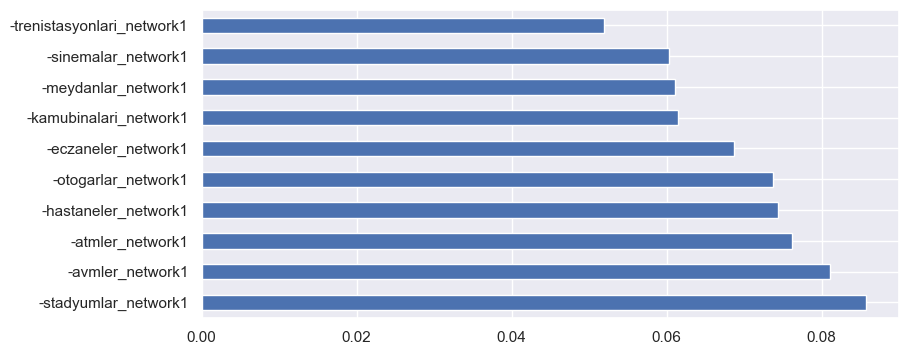

In [44]:
feat_importances = pd.Series(modelrf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
fig= ax.figure
fig.set_size_inches(9, 4)

In [82]:
#XGB Feature Importance
ax = xgb.plot_importance(model, max_num_features=10, importance_type='gain', show_values=True) 

fig = ax.figure
fig.set_size_inches(10, 3)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 µs


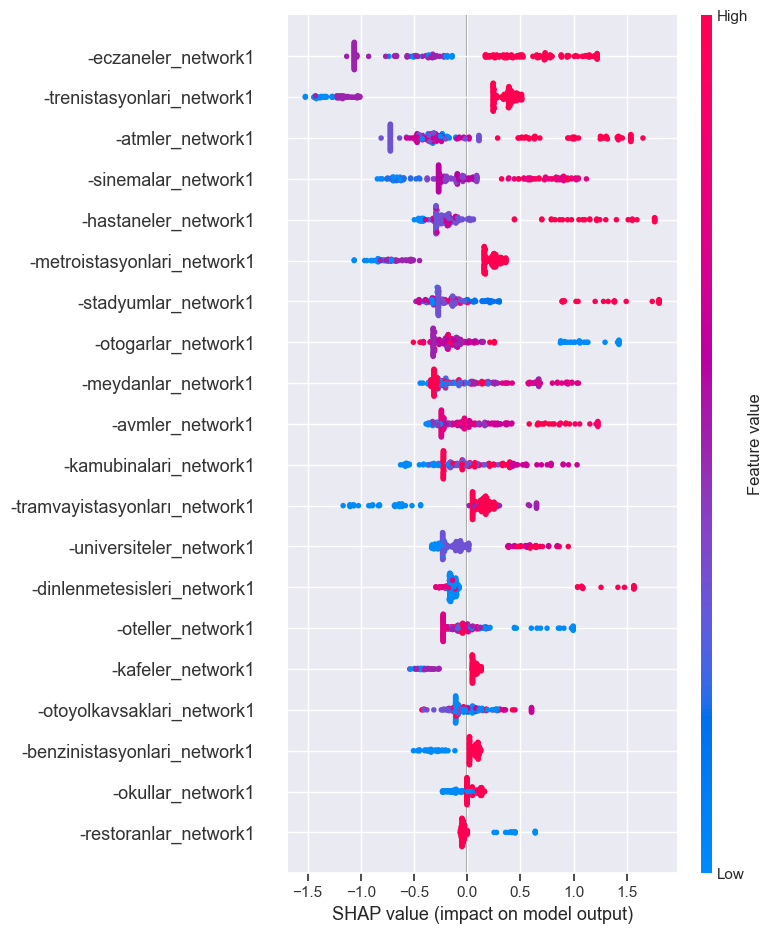

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1800; total time=   0.6s
[CV] END bootstrap=False, max_depth

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   1.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   0.3s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1600; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   0.7s
[CV] END bootstrap=False, max_depth=1

[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   0.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=2000; total time=   0.8s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   1.5s
[CV] END bootstrap=False, max_depth

In [45]:
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(modelrf)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, samples)

In [58]:
rf_y_pred_test

array([ 5.93726991,  3.05042017,  5.19422769,  1.33105879, 16.09051522,
        0.82563025,  3.60355212, 12.71568377, 10.48760504,  2.42608543,
       14.17549671,  3.89880952,  5.17068123,  0.46008403, 12.4904912 ,
        1.33105879,  0.18092237,  1.01437908, 13.55900845,  1.96122199,
        2.71078431,  5.18809524,  1.20068027,  3.95378151,  1.33105879,
       16.09051522,  1.33105879,  2.71119827,  2.71119827,  5.18809524,
        5.18809524,  1.81932773,  6.81004902,  6.53886397,  2.79254202,
        2.56703591,  2.24681691, 16.09051522,  3.76095938,  2.64285714,
       11.08018207,  5.69288966,  1.60136555, 16.09051522,  3.76095938,
        3.28931156,  1.997509  ,  3.09243697,  1.33105879,  2.3657563 ,
        1.33105879,  4.67201446,  2.71119827, 10.26260504,  2.60423169,
        1.56145704,  1.33105879,  4.85084034,  1.53655462,  1.33105879,
        1.33105879, 11.62605042,  1.51260504,  7.62077831,  4.67474323,
       18.07885154,  2.62079832,  2.21043417, 27.20588235,  8.12

In [ ]:
df5 = pd.DataFrame(data = {
    'actual':y_test, 
    'predicted':rf_y_pred_test
    })
ax = sns.lmplot(x='actual', y='predicted', data = df5)
fig= ax.figure

In [27]:
X = df5.iloc[:, :-1].values # feature
y = df5.iloc[:, -1].values # label

reg = LinearRegression().fit(X, y)

print(f"Score: {reg.score(X, y)}")
print(f"Coefficient: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Score: 0.8580391570108803
Coefficient: [0.84762917]
Intercept: 41040.16817455951


In [29]:
df5

,actual,predicted
3603012,58500,47589.00
2536666,360000,345280.00
4400118,285000,287416.40
3092418,93000,87494.00
5128856,86000,77586.00
...,...,...
5573841,88000,134343.50
5595037,330000,294979.00
1382379,57800,69467.30
4618845,199995,222273.35
